In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

import seaborn as sb

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
chromConvert = {
               'chr_18': 0, 
               'chr_18_p11_deletion': 1
               }

In [3]:
chromConvert_reverse = {
                0: 'chr_18',
                1: 'chr_18_p11_deletion'
               }

In [4]:
label = ['chr_18', 'chr_18_p11_deletion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

# Load test and predict values

In [5]:
y_test_all = []
y_predict_all = []
y_predict_filtered_all = []

In [6]:
for iterationNumber in range(5):
    with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_test:
        y_test_all.append(np.load(f_y_test))
        
    with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict:
        y_predict_all.append(np.load(f_y_predict))                             
                        
    with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict_filtered:
        y_predict_filtered_all.append(np.load(f_y_predict_filtered))

In [7]:
y_predict_all[0].shape

(51, 2)

In [8]:
y_predict_all

[array([[1.00000000e+00, 5.27523691e-10],
        [9.59544957e-01, 2.70966411e-01],
        [1.00000000e+00, 1.66170321e-06],
        [1.00000000e+00, 7.14791895e-07],
        [1.00000000e+00, 2.93206017e-06],
        [9.99994278e-01, 6.80152676e-04],
        [9.99890327e-01, 1.06699835e-03],
        [1.00000000e+00, 4.22345892e-08],
        [1.00000000e+00, 4.83318108e-10],
        [9.99224067e-01, 6.33096462e-03],
        [1.00000000e+00, 1.04788320e-07],
        [1.00000000e+00, 1.98105965e-07],
        [1.00000000e+00, 5.79533435e-08],
        [1.00000000e+00, 9.55288613e-08],
        [9.99811471e-01, 5.31309983e-03],
        [1.00000000e+00, 7.62240120e-08],
        [1.00000000e+00, 5.22414609e-07],
        [9.99304414e-01, 1.60913803e-02],
        [1.00000000e+00, 8.56867359e-08],
        [9.99973655e-01, 6.54616801e-04],
        [1.00000000e+00, 9.59609906e-07],
        [9.99998212e-01, 1.67953229e-04],
        [9.99999881e-01, 3.25115661e-06],
        [1.00000000e+00, 1.7720359

In [9]:
y_test_concatenate_list = []
y_predict_concatenate_list = []
y_predict_filtered_concatenate_list = []

In [10]:
for i in range(5):
    y_test_concatenate_list.extend(list(y_test_all[i]))
    y_predict_concatenate_list.extend(list(y_predict_all[i]))
    y_predict_filtered_concatenate_list.extend(list(y_predict_filtered_all[i]))

In [11]:
label_convert

['chr_18', 'chr_18_p11_deletion']

In [12]:
len(y_test_concatenate_list)

251

In [13]:
len(y_predict_filtered_concatenate_list)

251

In [14]:
len(y_predict_concatenate_list)

251

# Classification Report

## Accuracy

In [15]:
acc = accuracy_score(y_test_concatenate_list, y_predict_filtered_concatenate_list, normalize=True, sample_weight=None)
print('Accuracy is ', acc)

Accuracy is  0.8924302788844621


## Precision, Recall, and F1

In [16]:
performanceReport = classification_report(y_test_concatenate_list, y_predict_filtered_concatenate_list, 
                                          target_names=label_convert)


print(performanceReport)

                     precision    recall  f1-score   support

             chr_18       0.90      0.95      0.93       176
chr_18_p11_deletion       0.86      0.76      0.81        75

          micro avg       0.89      0.89      0.89       251
          macro avg       0.88      0.85      0.87       251
       weighted avg       0.89      0.89      0.89       251



## Confusion Matrix

In [17]:
cm = np.array(confusion_matrix(y_test_concatenate_list, y_predict_filtered_concatenate_list))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Combination_of_CrossValidation_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_18,chr_18_p11_deletion
chr_18,167,9
chr_18_p11_deletion,18,57


### 3.10.4 Rate of Confusion Matrix

### 3.10.5 Recall (查全率)，(Sensitivity Rate)

In [18]:
subtotal = [0] * 2  
for item in y_test_concatenate_list:
    subtotal[item] = subtotal[item] + 1

#### predict number divided by y test

In [19]:
cm_r = []
for i in range(2):
    cm_r.append(cm[i]/subtotal[i])

In [20]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion_r.to_csv('ConfusionMatrix_Recall_Integration_CNN.csv')
confusion_r

,chr_18,chr_18_p11_deletion
chr_18,0.948864,0.051136
chr_18_p11_deletion,0.240000,0.760000


### 3.10.6 Precision (查准率）

In [21]:
subtotal_predict = [0] * 2 
for item in y_predict_filtered_concatenate_list:
    subtotal_predict[item] = subtotal_predict[item] + 1

#### predict number divided by y predicted

In [22]:
cm_p = []
for i in range(2):
    cm_p.append(cm[:,i]/subtotal_predict[i])

In [23]:
confusion_p = pd.DataFrame(cm_p, index=label_convert,
                        columns=label_convert)
confusion_p.to_csv('ConfusionMatrix_Precision_Integration_CNN.csv')
confusion_p

,chr_18,chr_18_p11_deletion
chr_18,0.902703,0.097297
chr_18_p11_deletion,0.136364,0.863636


#### Heat Map: Number

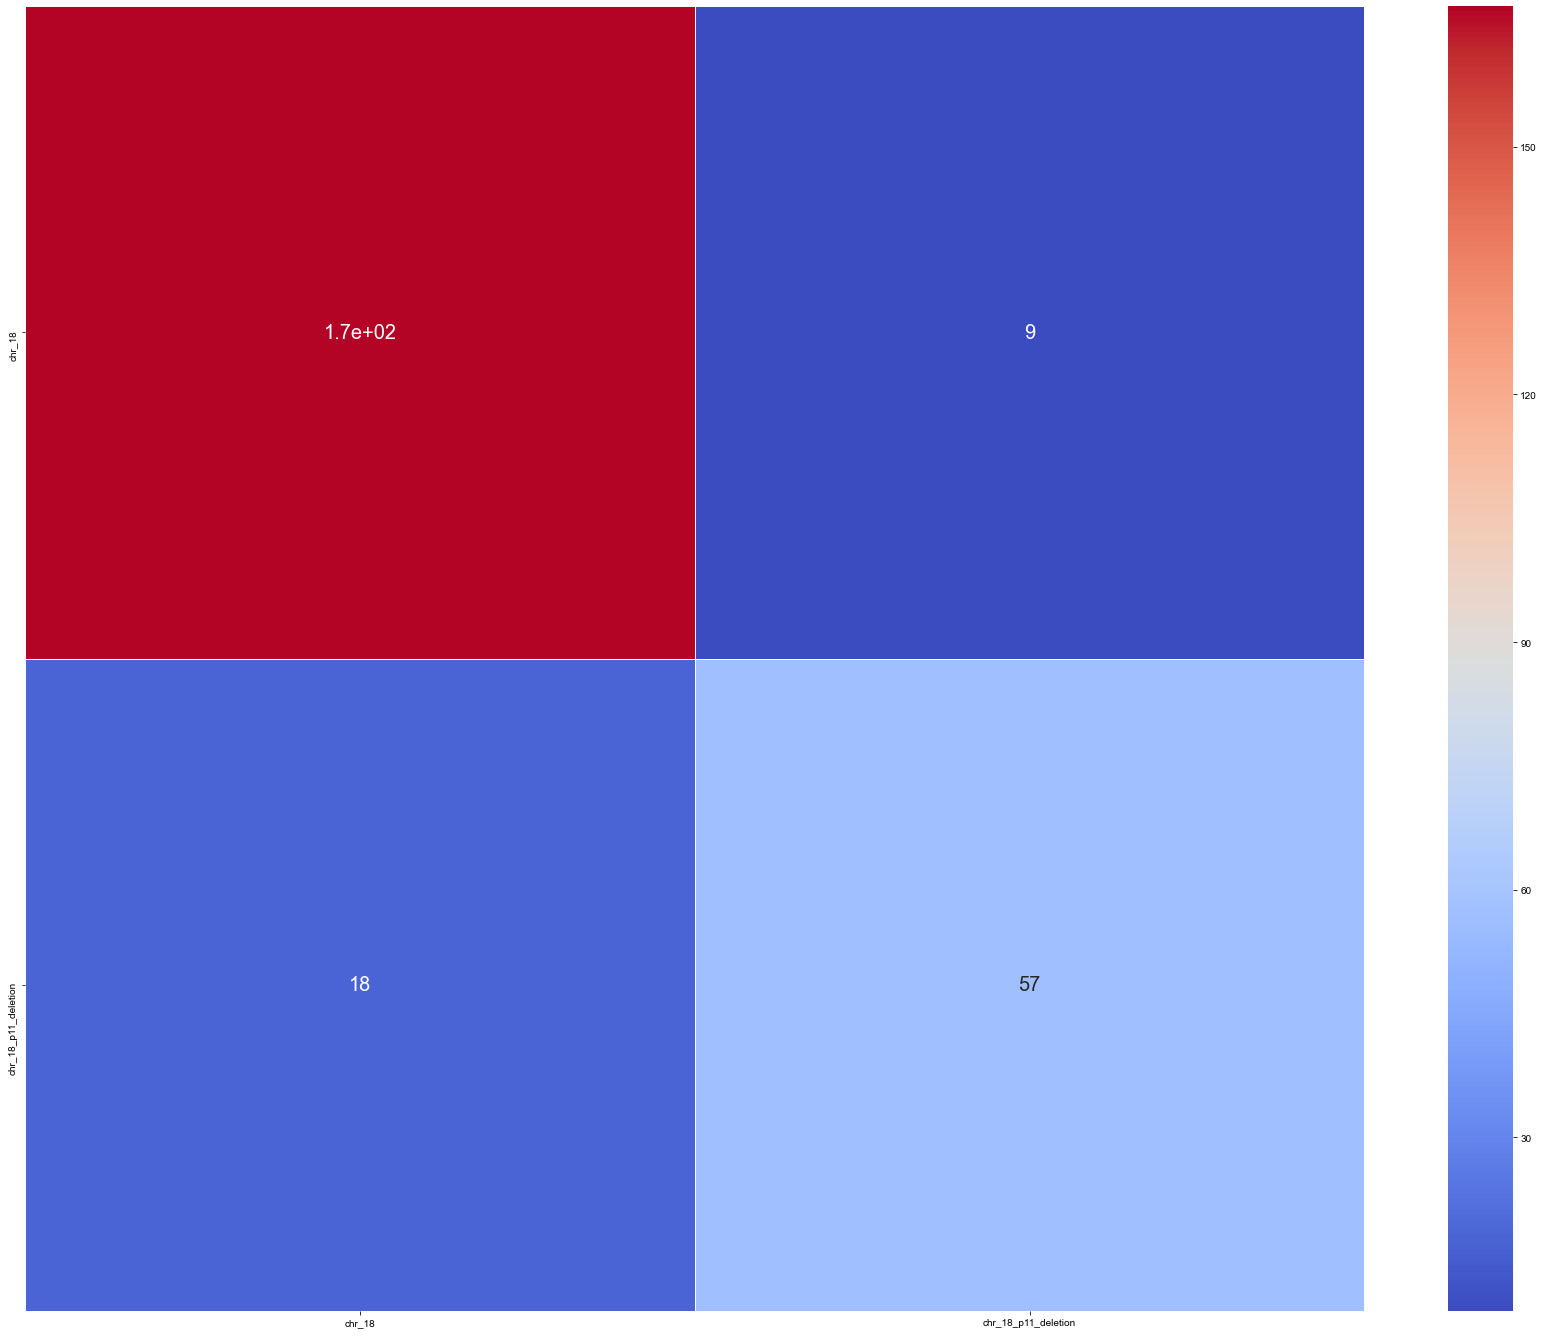

In [24]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

#### Heat Map of Recall: Rate (important!!!)

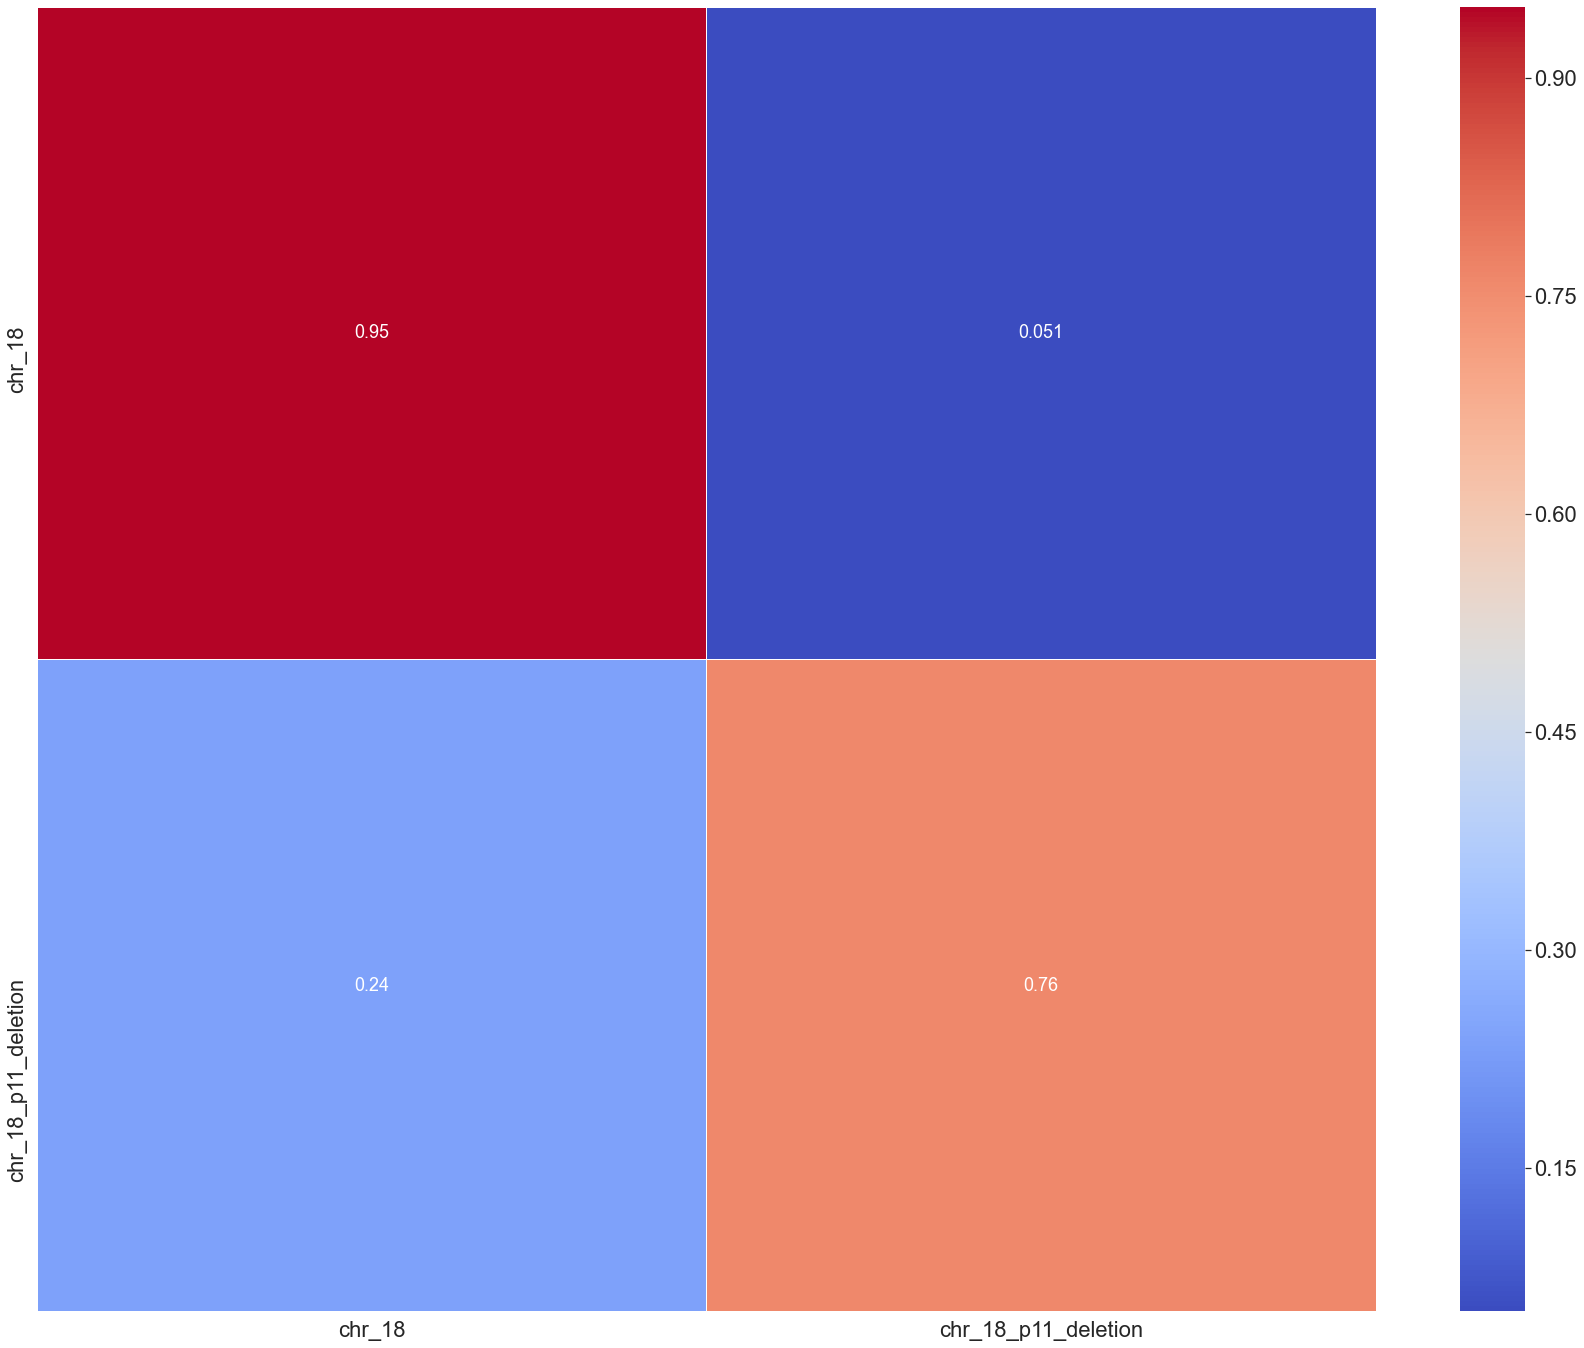

In [25]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=1, 
                      annot_kws={"size": 18})
sb.set(font_scale = 2)

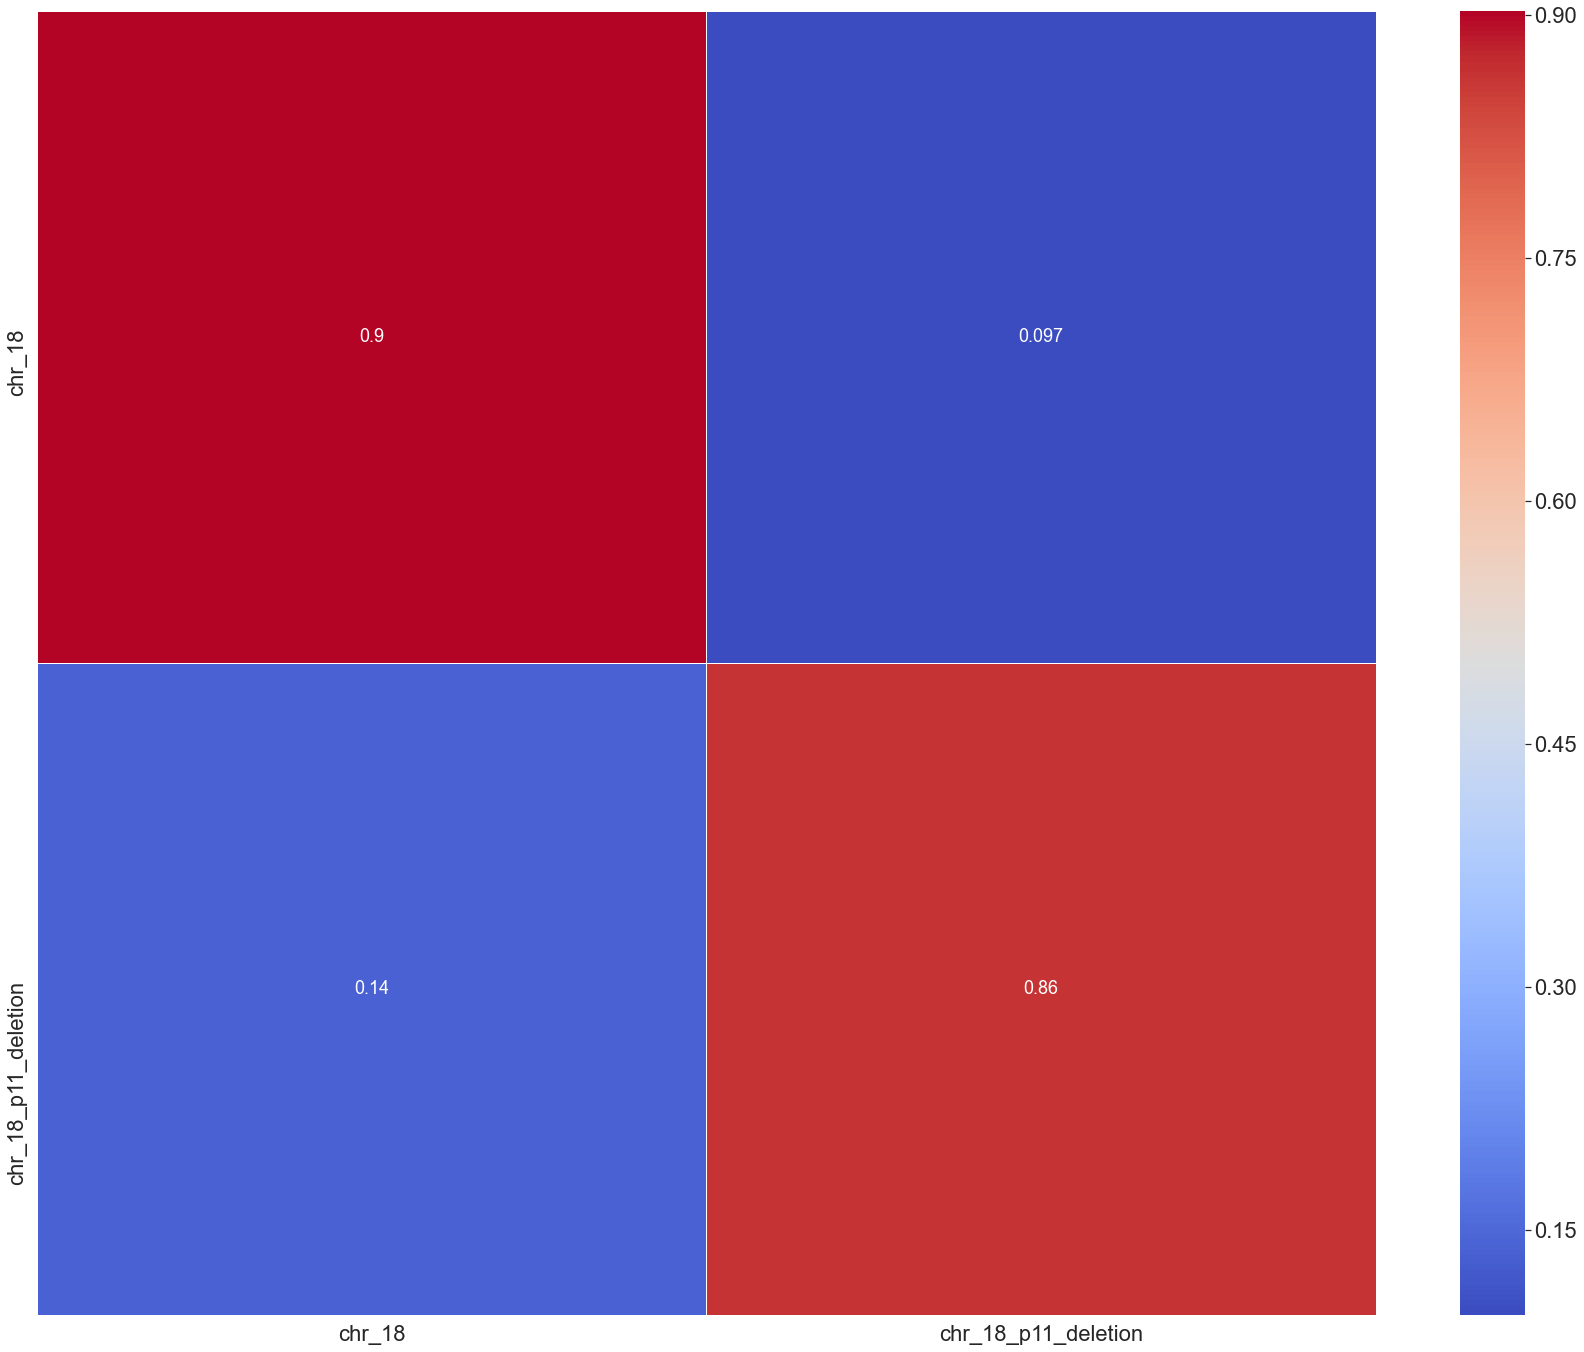

In [26]:
plt.figure(figsize=(30, 24))
heat_map_p = sb.heatmap(confusion_p, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=1, 
                      annot_kws={"size": 18})
sb.set(font_scale = 2)

In [27]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Combination.png', dpi=400)

In [28]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Recall_Combination.png', dpi=400)

In [29]:
fig_p = heat_map_p.get_figure()    
fig_p.savefig('Heatmap_Precision_Combination.png', dpi=400)

# ROC Curve

In [30]:
y_predict_concatenate_list

[array([1.000000e+00, 5.275237e-10], dtype=float32),
 array([0.95954496, 0.2709664 ], dtype=float32),
 array([1.0000000e+00, 1.6617032e-06], dtype=float32),
 array([1.000000e+00, 7.147919e-07], dtype=float32),
 array([1.0000000e+00, 2.9320602e-06], dtype=float32),
 array([9.999943e-01, 6.801527e-04], dtype=float32),
 array([0.9998903, 0.001067 ], dtype=float32),
 array([1.000000e+00, 4.223459e-08], dtype=float32),
 array([1.000000e+00, 4.833181e-10], dtype=float32),
 array([0.99922407, 0.00633096], dtype=float32),
 array([1.0000000e+00, 1.0478832e-07], dtype=float32),
 array([1.0000000e+00, 1.9810597e-07], dtype=float32),
 array([1.0000000e+00, 5.7953343e-08], dtype=float32),
 array([1.000000e+00, 9.552886e-08], dtype=float32),
 array([0.9998115, 0.0053131], dtype=float32),
 array([1.000000e+00, 7.622401e-08], dtype=float32),
 array([1.000000e+00, 5.224146e-07], dtype=float32),
 array([0.9993044 , 0.01609138], dtype=float32),
 array([1.0000000e+00, 8.5686736e-08], dtype=float32),
 arra

In [31]:
len(y_predict_concatenate_list)

251

In [32]:
y_predict_concatenate_array

NameError: name 'y_predict_concatenate_array' is not defined

In [ ]:
y_predict_1D = y_predict[:,0]

In [ ]:
y_predict_1D_processed = 1- y_predict_1D

In [ ]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [ ]:
auc_rf

In [ ]:
x = y = np.arange(0,1.1,0.1)

In [ ]:
x

In [ ]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of 18p11', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(0,1)
plt.ylim(0,1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_05_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [ ]:
auc_value = auc(fpr, tpr)

In [ ]:
print('AUC is ', auc_value)

# Results

In [ ]:
print('Test Accuracy: %.3f' % acc)

In [ ]:
print(performanceReport)

In [ ]:
type(performanceReport)

In [ ]:
print('AUC is ', auc_value)

## Export to a text file

In [ ]:
file_report = open('ResultsCombination.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.write('Recall of Confusion Matrix: \n%s.\n\n' % confusion_r)
file_report.write('Precision of Confusion Matrix: \n%s.\n\n' % confusion_p)
file_report.close()

In [ ]:
a = np.array([[1,2],[2,3],[3,4]])
b = np.array([[10,20],[20,30],[30,40]])

In [ ]:
a

In [ ]:
b

In [ ]:
np.concatenate((a, b))